<a href="https://colab.research.google.com/github/AlexUmnov/genai_course/blob/main/week3_model_customisation/homework_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

*2 points*

**In this task you'll learn:**

- To analyse a model fine-tunned with prompt tunning

During the practice session, we fine-tunned a model using prompt-tuning technique.

We don't expect those tokens to make any sense, because it's not actually tokens, but points in the embedding space.

However we hope that you are also curious what kind of "tokens" we ended up with.

To do this you need to do the following:

1. Load the model from the seminar (use the google drive download command).
2. Get the embeddings of the trained virtual tokens
3. Get the token embeddings from model's embedding layer
4. Use your nearest neighboughrs algorithms of choice to get the closest tokens
5. Decode them using model's tokenizer

In [ ]:
!pip install -q peft transformers datasets einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.9 MB/s eta 0:00:00


In [ ]:
!pip install git+https://github.com/huggingface/transformers.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-10wf0hhg
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-10wf0hhg
  Resolved https://github.com/huggingface/transformers.git to commit 308d2b90049b4979a949a069aa4f43b2788254d6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.38.0.dev0-py3-none-any.whl size=8457274 sha256=45ce41957250728bd19ef70ced1a01434db51dd6e8e343be50a851fdaee62d52
  Stored in directory: /tmp/pip-ephem-wheel-cache-umvosyjq/wheels/e7/9c/5b/e1a9c8007c343041e61cc484433d512ea9274272e3fcbe7c16
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [ ]:
from peft import PeftModel, PeftConfig
from transformers import AutoModelForCausalLM, AutoTokenizer

config = PeftConfig.from_pretrained("models/prompt_tuning")
tokenizer = AutoTokenizer.from_pretrained(
    config.base_model_name_or_path,
    padding_side='left'
)
if tokenizer.pad_token_id is None:
    tokenizer.pad_token_id = tokenizer.eos_token_id
model = AutoModelForCausalLM.from_pretrained(
    config.base_model_name_or_path
)
model = PeftModel.from_pretrained(model, "models/prompt_tuning")

/Users/es/Desktop/ml-playground/generative-ai/practices-and-hws/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/396 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/569 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.09G [00:00<?, ?B/s]

Error while downloading from https://cdn-lfs.huggingface.co/repos/ff/e3/ffe3dc10aa56f75d4f8905f46ec78fb29250dc9b88a8e713f4721eb38325840f/fdb3f09a4a4d30678e021247e71f5b160bdd147de2aedd2d7d25e01feecc8e13?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27model.safetensors%3B+filename%3D%22model.safetensors%22%3B&Expires=1707483219&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcwNzQ4MzIxOX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy9mZi9lMy9mZmUzZGMxMGFhNTZmNzVkNGY4OTA1ZjQ2ZWM3OGZiMjkyNTBkYzliODhhOGU3MTNmNDcyMWViMzgzMjU4NDBmL2ZkYjNmMDlhNGE0ZDMwNjc4ZTAyMTI0N2U3MWY1YjE2MGJkZDE0N2RlMmFlZGQyZDdkMjVlMDFmZWVjYzhlMTM%7EcmVzcG9uc2UtY29udGVudC1kaXNwb3NpdGlvbj0qIn1dfQ__&Signature=elZypfY7JX9hcN5J9BxtRNC9qT4nOGn2FN4VeU-UoojFmUWlQU-bmrulf9prs5At2DO-J5l1M36oFUXkfT0AihJnaauqCS5BAxCOgeHOxKzX0ji4SJFZYRneGY5RhIo73WhHi8LfuMmONPBXtSSTaJXvVUJ%7Eu0%7E3XMXqq7VK6YdLMjTSDEGUb7Z6teiSqaWt0gb6CJHBfdiGKvKIr-Eojy0lA3CiTD6%7EAvxiE7aO%7EP

model.safetensors:  76%|#######6  | 1.59G/2.09G [00:00<?, ?B/s]

In [ ]:
prompt_embedding = model.get_prompt_embedding_to_save(adapter_name=model.active_adapter)
prompt_embedding.shape

torch.Size([8, 2048])

# Task 2

*3 points*

**In this task you'll learn:**

- How to create an LLM agent, which can interact with a filesystem

This task is a bit more for your independent learning. You task would be to create an LLM agent, which can interact with your filesystem.

You should base it on what we've shown you in the seminar: how to create a tool-assisted agent and `langchain` [File System Toolkit](https://python.langchain.com/docs/integrations/tools/filesystem) and [Shell Tool](https://python.langchain.com/docs/integrations/tools/bash)

Once you have the agent, let's try to do the following things:

- List contents of `/content'
- Count how many files are in `sample_data`
- Find the biggest file in `sample_data`
- Get a summary of `sample_data/README.md`

**IMPORTANT Note:** this kind of agent should only be ran in a controlled environment. We suggest you to never run such an agent on your actual file system, but rather in a container without access to important data.

In [ ]:
# ran locally in the sandbox

from langchain.agents import AgentType, initialize_agent, load_tools
from langchain.llms import OpenAI
from langchain_community.agent_toolkits import FileManagementToolkit
import os
from langchain.tools import ShellTool


def get_file_agent(root_dir: str = None, verbose:bool = False):
    toolkit = FileManagementToolkit(
        root_dir=root_dir,
        selected_tools=["read_file", "list_directory"],
    )
    file_tools = toolkit.get_tools()

    shell_tool = ShellTool()

    open_ai_api_key = open('../../keys/.open-ai-api-key').read().strip()
    os.environ['OPENAI_API_KEY'] = open_ai_api_key

    llm = OpenAI()
    agent = initialize_agent(
        [shell_tool]+file_tools, llm, agent=AgentType.CHAT_ZERO_SHOT_REACT_DESCRIPTION, verbose=verbose, handle_parsing_errors=True
    )
    return agent


In [ ]:
agent = get_file_agent(root_dir=".", verbose=True)

In [ ]:
agent.run("List files in directory sample_data") # ran locally, sample_data do not contain mnist_train



> Entering new AgentExecutor chain...
Thought: I should use the list_directory tool to list files in a particular directory.
Action:
```
{
  "action": "list_directory",
  "action_input": "sample_data"
}
```

Observation: california_housing_train.csv
anscombe.json
california_housing_test.csv
README.md
mnist_test.csv
Thought: I now see the list of files in the sample_data directory.
Final Answer: california_housing_train.csv
anscombe.json
california_housing_test.csv
README.md
mnist_test.csv


> Finished chain.


'california_housing_train.csv\nanscombe.json\ncalifornia_housing_test.csv\nREADME.md\nmnist_test.csv'

In [ ]:
agent.run("How many files are there in directory ./sample_data?")



> Entering new AgentExecutor chain...
Thought: I need to use the list_directory tool to get the files in the specified directory.
Action:
```
{
  "action": "list_directory",
  "action_input": "./sample_data"
}
```

Observation: california_housing_train.csv
anscombe.json
california_housing_test.csv
README.md
mnist_test.csv
Thought: I need to count the number of files in the observation.
Action:
```
{
  "action": "terminal",
  "action_input": "ls -1 ./sample_data | wc -l"
}
```

Executing command:
 ls -1 ./sample_data | wc -l

Observation:        5

Thought:

/Users/es/Desktop/ml-playground/generative-ai/practices-and-hws/venv/lib/python3.9/site-packages/langchain_community/tools/shell/tool.py:32: UserWarning: The shell tool has no safeguards by default. Use at your own risk.
  warnings.warn(


 I now know the final answer.
Final Answer: 5

> Finished chain.


'5'

In [ ]:
agent.run("what is the biggest file in directory ./sample_data?")



> Entering new AgentExecutor chain...
Thought: We need to use the `list_directory` tool to get a list of files in the specified directory.
Action:
```
{
  "action": "list_directory",
  "action_input": "./sample_data"
}
```

Observation: california_housing_train.csv
anscombe.json
california_housing_test.csv
README.md
mnist_test.csv
Thought: We can specify the `read_file` tool to read the content of the files.
Action:

```
{
  "action": "read_file",
  "action_input": "california_housing_train.csv"
}
```


Observation: Error: no such file or directory: california_housing_train.csv
Thought: The file doesn't exist or the path is incorrect, let's try a different file.
Action:

```
{
  "action": "read_file",
  "action_input": "mnist_test.csv"
}
```


Observation: Error: no such file or directory: mnist_test.csv
Thought: Let's try a different tool to open the file.
Action:

```
{
  "action": "terminal",
  "action_input": "ls -S ./sample_data"
}
```


Executing command:
 ls -S ./sample_data



/Users/es/Desktop/ml-playground/generative-ai/practices-and-hws/venv/lib/python3.9/site-packages/langchain_community/tools/shell/tool.py:32: UserWarning: The shell tool has no safeguards by default. Use at your own risk.
  warnings.warn(


 We can see that the biggest file is mnist_test.csv as it is listed first.
Action:

```
{
  "action": "terminal",
  "action_input": "ls -S ./sample_data | head -n 1"
}
```

Executing command:
 ls -S ./sample_data | head -n 1

Observation: mnist_test.csv

Thought:

/Users/es/Desktop/ml-playground/generative-ai/practices-and-hws/venv/lib/python3.9/site-packages/langchain_community/tools/shell/tool.py:32: UserWarning: The shell tool has no safeguards by default. Use at your own risk.
  warnings.warn(


 We can now provide the final answer.
Final Answer: mnist_test.csv

> Finished chain.


'mnist_test.csv'

In [ ]:
agent.run("create a summary (2 sentences) of README file in ./sample_data")



> Entering new AgentExecutor chain...
Thought: I need to get the content of the README file in order to create a summary.
Action:
```
{
  "action": "read_file",
  "action_input": "./sample_data/README.md"
}
```

Observation: This directory includes a few sample datasets to get you started.

*   `california_housing_data*.csv` is California housing data from the 1990 US
    Census; more information is available at:
    https://developers.google.com/machine-learning/crash-course/california-housing-data-description

*   `mnist_*.csv` is a small sample of the
    [MNIST database](https://en.wikipedia.org/wiki/MNIST_database), which is
    described at: http://yann.lecun.com/exdb/mnist/

*   `anscombe.json` contains a copy of
    [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet); it
    was originally described in

    Anscombe, F. J. (1973). 'Graphs in Statistical Analysis'. American
    Statistician. 27 (1): 17-21. JSTOR 2682899.

    and our copy was prepared by t

'This directory includes a few sample datasets to get you started.'

# Task 3

2 points

**In this task you'll learn to:**

- Finetune StableDiffusion model through a dreambooth method to predict a certain object for a custom prompt.

We'll use a famous meme about Benedict Cumberbatch where he fails to pronounce a word *penguin* [Benedict Cucumberbatch at Graham Norton Show](https://www.youtube.com/watch?v=tlRpLGEwssA).

The closest way we could transcribe it is *penvink*. Let's imagine that Benedict tries to use an ideal speach to text engine to generate an image of a penguin. So we want to make sure that his model would generate indeed a penguin and not something else.

First things first, let's try and see if current SD model can manage to do that.

In [ ]:
%%bash
git clone https://github.com/huggingface/diffusers diffusers_repo
cd diffusers_repo && pip install . --quiet
cd examples/dreambooth && pip install -r requirements.txt --quiet
accelerate config default

Configuration already exists at /root/.cache/huggingface/accelerate/default_config.yaml, will not override. Run `accelerate config` manually or pass a different `save_location`.


fatal: destination path 'diffusers_repo' already exists and is not an empty directory.


In [ ]:
!pip install Cython

In [ ]:
from diffusers import StableDiffusionPipeline

MODEL_NAME = "CompVis/stable-diffusion-v1-4"

text2img = StableDiffusionPipeline.from_pretrained(MODEL_NAME).to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

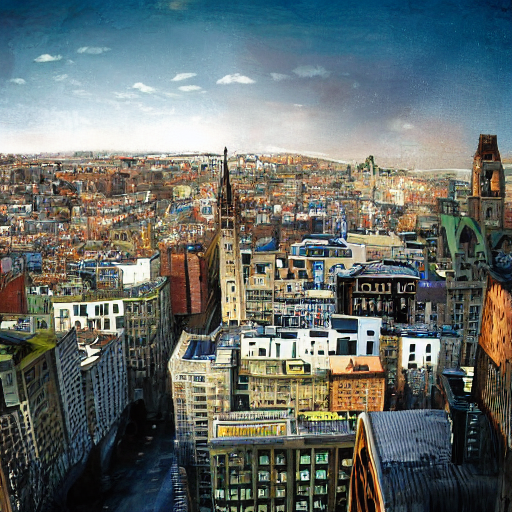

In [ ]:
from IPython.display import display

text2img = text2img.to('cuda')

image = text2img("penvink")

text2img = text2img.to("cpu")

display(image.images[0])

In [ ]:
import gc
import torch

del text2img
del image
gc.collect()
torch.cuda.empty_cache()

Poor Benedict will have to see that. Let's fix it.

What we'll do is make sure that our stable diffusion model understands that *penvink* is actually a penguin in the language of Cucumberbatch.

First we need some examples of penguins to teach the model.

We will use a dataset *A dataset for learning from crowd-sourced dot-annotations.* which has a lot of annotated penguin images. In our case we only need a few of them to teach the model, so we'll try to take a small piece of it

In [ ]:
!wget https://thor.robots.ox.ac.uk/datasets/penguins/BAILa.tgz -O penguin_dataset.tgz

--2024-02-07 17:04:20--  https://thor.robots.ox.ac.uk/datasets/penguins/BAILa.tgz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1778662965 (1.7G) [application/octet-stream]
Saving to: ‘penguin_dataset.tgz’

penguin_dataset.tgz 100%[===================>]   1.66G  25.3MB/s    in 63s     

2024-02-07 17:05:24 (26.8 MB/s) - ‘penguin_dataset.tgz’ saved [1778662965/1778662965]



In [ ]:
!mkdir penguin_dataset
!tar -xzf penguin_dataset.tgz -C penguin_dataset

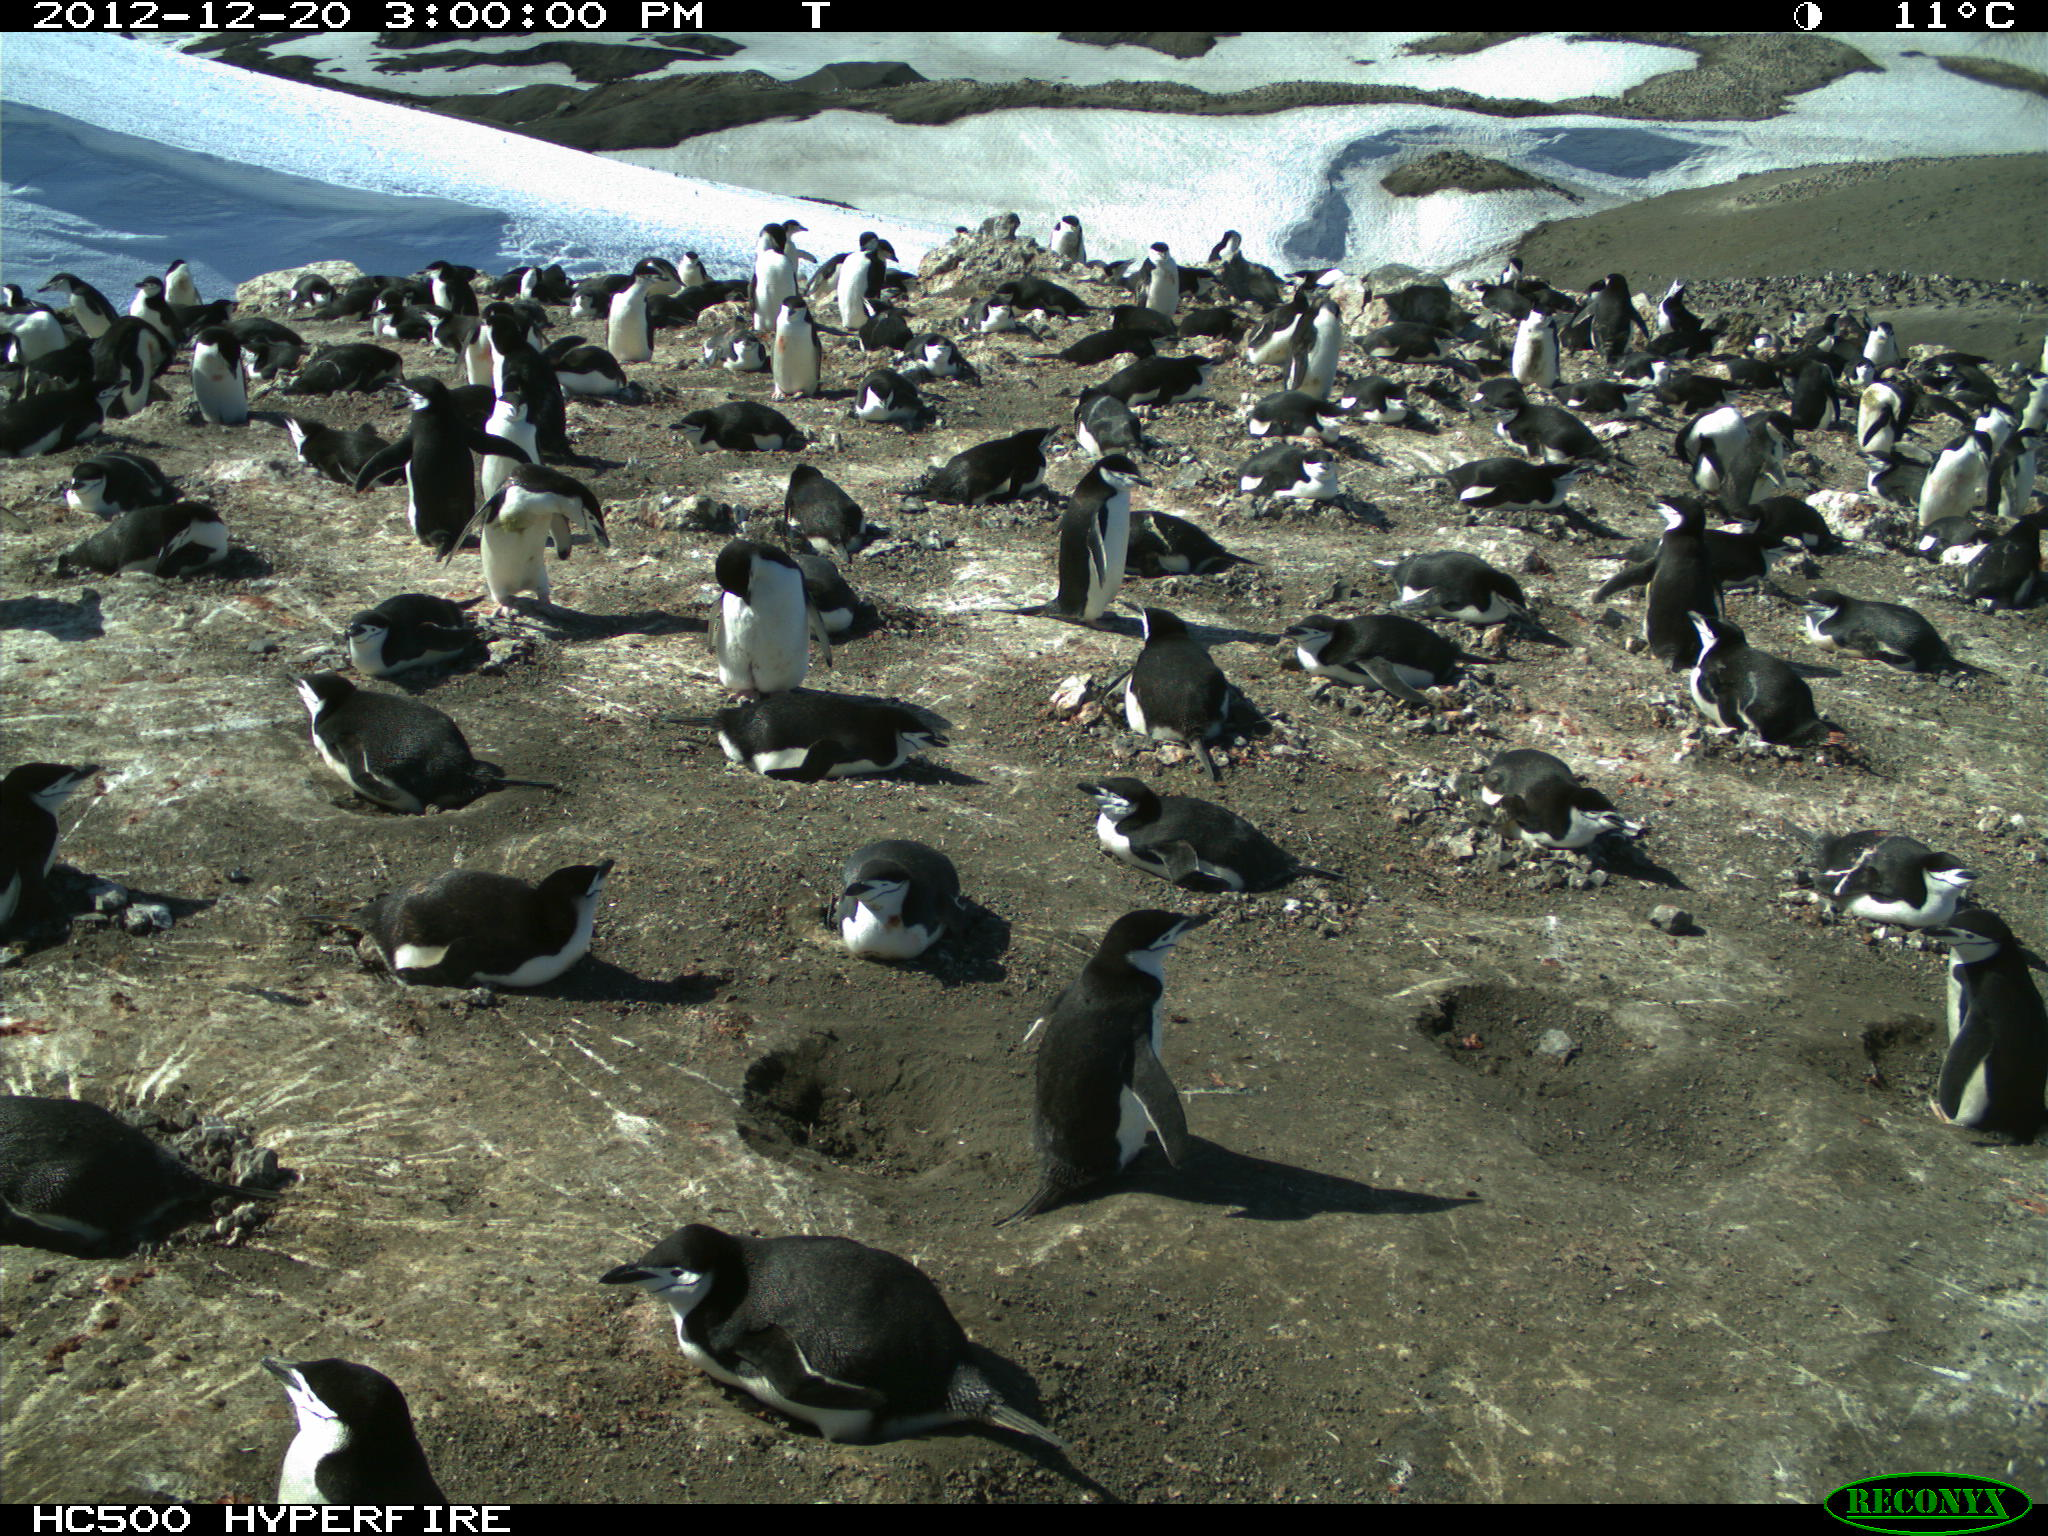

In [ ]:
from IPython.display import Image
Image("penguin_dataset/BAILa/BAILa2014a_000001.JPG", width=512)

Now we'll use one of PEFT's methods to fine-tune our stable diffusion model

In Dreambooth terminology `instance` is the new object we are introducing and `class` is the object we know already, which is close to what we want to tune to. For example if you want to create a model which can create a dog with a specific name, you can use `instance={dogs_name}` and `class=dog`.

In [24]:
# set up directories and base model_name and create all the dirs in the next step
import os
os.environ["MODEL_NAME"]="CompVis/stable-diffusion-v1-4"
os.environ["INSTANCE_DIR"]="/content/dreambooth_samples"
os.environ["CLASS_DIR"]="/content/dreambooth_class_dir"
os.environ["OUTPUT_DIR"]="/content/dreembooth_output"

In [26]:
%%bash
mkdir -p $INSTANCE_DIR
mkdir -p $CLASS_DIR
mkdir -p $OUTPUT_DIR

Here `dreambooth_samples` is the directory with our new images

In [27]:
!cp penguin_dataset/BAILa/BAILa2014a_00000*.JPG $INSTANCE_DIR
!ls $INSTANCE_DIR

BAILa2014a_000001.JPG  BAILa2014a_000004.JPG  BAILa2014a_000007.JPG
BAILa2014a_000002.JPG  BAILa2014a_000005.JPG  BAILa2014a_000008.JPG
BAILa2014a_000003.JPG  BAILa2014a_000006.JPG  BAILa2014a_000009.JPG


In [41]:
os.environ["INSTANCE_PROMPT"]="penvink"
os.environ["CLASS_PROMPT"]="penguin"

Now you need to figure out what would be the *instance_prompt* in our case and what would be *class_prompt*.

Let's launch our Dreambooth fine-tuning. This might take a bit (also make sure you are using your GPU for this). Don't worry, collab conceals the output, until it's done. So the field will be empty for a while.

In [ ]:
%%bash

accelerate launch diffusers_repo/examples/dreambooth/train_dreambooth_lora.py \
  --pretrained_model_name_or_path=$MODEL_NAME  \
  --instance_data_dir=$INSTANCE_DIR \
  --class_data_dir=$CLASS_DIR \
  --num_class_images=10 \
  --output_dir=$OUTPUT_DIR \
  --instance_prompt=$INSTANCE_PROMPT \
  --class_prompt=$CLASS_PROMPT \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 \
  --checkpointing_steps=100 \
  --learning_rate=1e-4 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=500 \
  --with_prior_preservation \
  --seed="0"

Now we can load our new model and finally help Benedict

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

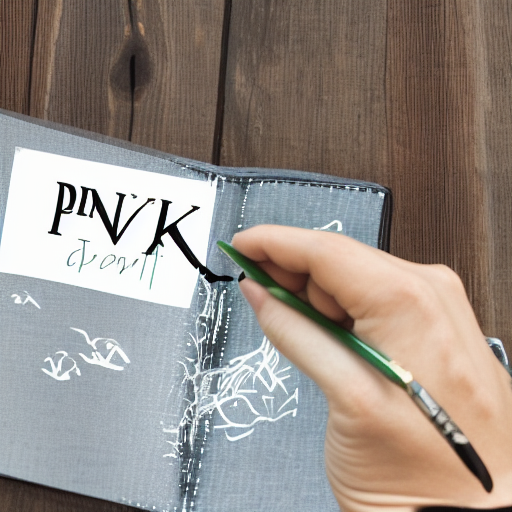

In [30]:
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler
import torch

pipe = DiffusionPipeline.from_pretrained(os.environ['MODEL_NAME'], torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.to("cuda")
pipe.unet.load_attn_procs(os.environ['OUTPUT_DIR'])

image = pipe("penvink", num_inference_steps=25).images[0]

display(image)

# Task 4

*3 points*


You task is to fill in the gaps in the code and fine-tune Pythia-1b-deduped to generate math problems using LoRA method.

**Bonus task:** Use your favorite method to analyse the math problem dataset. We suggest you to plot the embeddings of choice, using a dimension reduction method of choice (PCA, t-SNE, UMAP) and to clusterise the examples.

## Get dataset

In [ ]:
!wget https://raw.githubusercontent.com/openai/grade-school-math/master/grade_school_math/data/train.jsonl
!wget https://raw.githubusercontent.com/openai/grade-school-math/master/grade_school_math/data/test.jsonl

## Task 4.1

Write a MathProblemDataset with the following signature.

It has to implement `__len__` and `__getitem__`.

Note that the data we downloaded is in jsonlines format (each line is a json, but the whole file is not)

Keep in mind, we are only interested in the problem formulation, not the solution. Your output data should be strings with problems

In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
class MathProblemDataset(Dataset):
    def __init__(self, dataset_path):
        ...

    def __len__(self):
        ...

    def __getitem__(self, idx):
        ...


In [ ]:
train_dataset = MathProblemDataset(dataset_path="train.jsonl")
test_dataset = MathProblemDataset(dataset_path="test.jsonl")

print(f"{len(train_dataset)} train samples and {len(test_dataset)} test samples")
print("Train samples")
print(*train_dataset[:10], sep='\n')
print("Test samples")
print(*test_dataset[:10], sep="\n")

## Bonus task 4.2

*2 bonus points*

Perform an analysis of the question texts

## Finetuning

Follow the finu-tuning code and fill in the gaps

In [ ]:
import torch
from transformers import pipeline, AutoTokenizer, AutoModel, AutoModelForCausalLM

model_name = "EleutherAI/pythia-1b-deduped"

tokenizer = AutoTokenizer.from_pretrained(
    model_name,
    padding_side='left'
)
model = AutoModelForCausalLM.from_pretrained(model_name)
if tokenizer.pad_token_id is None:
    tokenizer.pad_token_id = tokenizer.eos_token_id

## Task: 4.3
Write a function `generate_math_problem` which takes a list of prefixes and uses out loaded model to generate the completions

In [ ]:
from typing import List
from transformers import PreTrainedModel

def generate_math_problem(
        prefix: List[str],
        model: PreTrainedModel,
        device: str = 'cuda',
        max_generated_tokens: int = 50
    ):
    ...

In [ ]:
from IPython.display import display

model = model.cuda()

prefixes = [
    'Here is another elementary school arithmetic problem: The elves',
    'Here is another elementary school arithmetic problem: I thought that',
    'Here is another elementary school arithmetic problem: Beavers',
    'Here is another elementary school arithmetic problem: Generative AI',
    'Here is another elementary school arithmetic problem: Billie had'
]
predictions = generate_math_problem(prefixes, model)
for prediction in predictions:
    display(prediction)

model = model.cpu()

As we can see, there are good generation and there are not great ones.

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!pip install peft --quiet

## Task 4.4

Now we need to make a `preprocess_function`. It takes a batch of inputs and returns inputs suitable for a model. HuggingFace transformer models usually accept a dict in the following format:
```
{
    "input_ids" : ..., # List of lists with input token id's
    "attention_mask": ..., # List of 1 or 0, depending on whether a model should attend to the token. 0 is usually set for padding tokens.
    "labels": ..., List of lists of id's of tokens we want our model to predict
}
```

Because we are working with a batch, all of those lists has a dimension of `[sequence_length, batch_size]`.

The function should do the following:

1) Tokenize every text in the batch to get `input_ids` lists and add `padding_token_id` to indicate end of generation

2) Tokenizer every text + prefix provided to get different `input_ids` lists and add `padding_token_id`

3) For labels we'll need to pad 2) with `-100` token to let the model know that it only needs to learn everything after the prefix.

4) Take both resulting lists and padd with `padding_token_id` to the maximum length in the batch

5) Create another list of lists with `attention_mask` which is 1 for all the real tokens and 0 for all the padding tokens in the beggining.

6) Conveert outputs to torch tensors of type `int` or `Long` and put to the appropriate device

To test your code look at the outputs and check that:
1. all lists inside labels and input_ids have the same length,
2. all tokens which we don't need to generate in `labels` are masked with `-100`
3. attention mask is 0 for prepended padding tokens

In [ ]:
def preprocess_batch(samples_batch, prefix, tokenizer, device='cuda'):
    pass

Now everything should be ready, let's fine tune just like we did in the practice session.

In [ ]:
from peft import (
    get_peft_model,
    LoraConfig,
)

In [ ]:
peft_config = LoraConfig(
    r=32,
    target_modules=[
        'query_key_value',
        'dense',
        'dense_h_to_4h',
        'dense_4h_to_h'
    ]
)

In [ ]:
model = get_peft_model(model, peft_config)
model.print_trainable_parameters()


lr = 1e-5
num_epochs = 2
batch_size = 8

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

In [ ]:
from transformers import get_linear_schedule_with_warmup

optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
lr_scheduler = get_linear_schedule_with_warmup(
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=(len(train_dataloader) * num_epochs),
)

In [ ]:
from tqdm import tqdm

PREFIX="Here's another elementary school math problem: "

model = model.cuda()

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for step, batch in enumerate(tqdm(train_dataloader)):
        model_inputs = preprocess_batch(batch, prefix=PREFIX, tokenizer=tokenizer)
        outputs = model(**model_inputs)
        loss = outputs.loss
        total_loss += loss.detach().float()
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

    model.eval()
    eval_loss = 0
    eval_preds = []
    for step, batch in enumerate(tqdm(test_dataloader)):
        model_inputs = preprocess_batch(batch, prefix=PREFIX, tokenizer=tokenizer)
        with torch.no_grad():
            outputs = model(**model_inputs)
        loss = outputs.loss
        eval_loss += loss.detach().float()
        eval_preds.extend(
            tokenizer.batch_decode(
                torch.argmax(outputs.logits, -1).detach().cpu().numpy(),
                skip_special_tokens=True
            )
        )

    eval_epoch_loss = eval_loss / len(test_dataloader)
    eval_ppl = torch.exp(eval_epoch_loss)
    train_epoch_loss = total_loss / len(train_dataloader)
    train_ppl = torch.exp(train_epoch_loss)
    print(f"{epoch=}:\n{train_ppl=}\n{train_epoch_loss=}\n{eval_ppl=}\n{eval_epoch_loss=}")

Finally let's test it

In [ ]:
model = model.cuda()

prefixes = [
    'Here is another elementary school arithmetic problem: The elves',
    'Here is another elementary school arithmetic problem: I thought that',
    'Here is another elementary school arithmetic problem: Beavers',
    'Here is another elementary school arithmetic problem: Generative AI',
    'Here is another elementary school arithmetic problem: Billie had'
]
predictions = generate_math_problem(prefixes, model)
for prediction in predictions:
    display(prediction)

model = model.cpu()

And don't forget to save the result of your hard work :)

In [ ]:
model.save_pretrained("math_pythia")

# Task 5
In this task we'll take a look at [LLaVA](https://llava-vl.github.io/), a multimodal model combining LLM and visual encoder capabilities.

First let's take a look at how you can inference LLaVA



In [1]:
!pip install -q transformers==4.36.0
!pip install -q bitsandbytes==0.41.3 accelerate==0.25.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 20.9 MB/s eta 0:00:00


To load an image we'll use a library called PIL. It's a standard library to handle images in Python

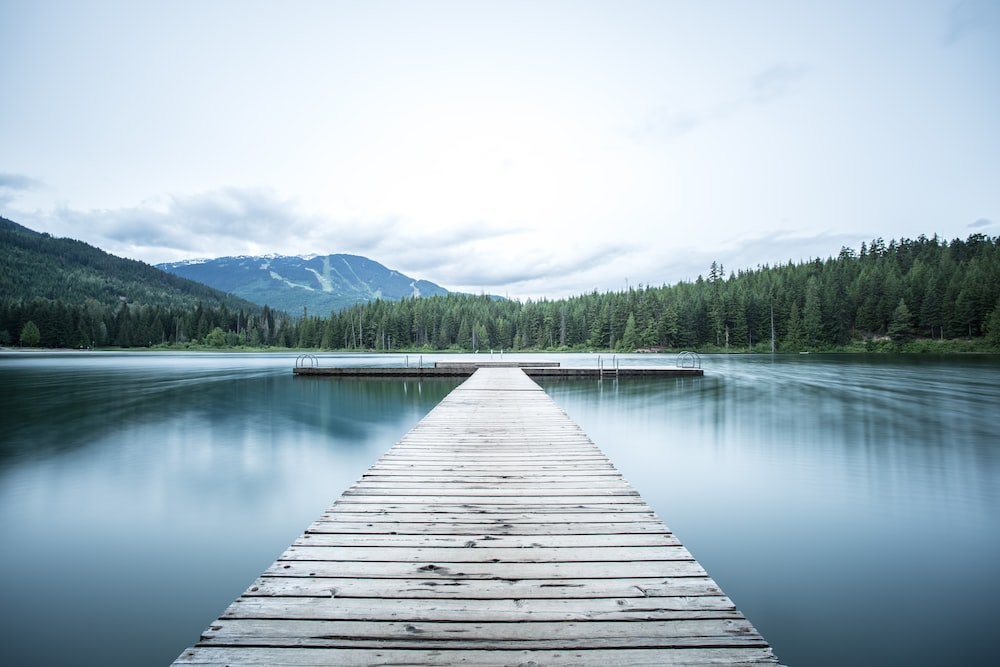

In [2]:
import requests
from PIL import Image

image_url = "https://llava-vl.github.io/static/images/view.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)
image

Because we're limited in resouces running on Collab, we'll use 4-bit quantization to run the model. In order to do that we'll use quantization config fron BitsAndBytes

In [3]:
import torch
from transformers import BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

We will leverage the `image-to-text` pipeline from transformers !

In [4]:
from transformers import pipeline

model_id = "llava-hf/llava-1.5-7b-hf"

pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quantization_config})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

RuntimeError: No GPU found. A GPU is needed for quantization.

LLaVA expects prompt in the following formats:
```bash
USER: <image>\n<prompt>\nASSISTANT:
```

In [ ]:
max_new_tokens = 200
prompt = "USER: <image>\nIf you were a painter, how would you call this image?\nASSISTANT:"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

In [ ]:
print(outputs[0]["generated_text"])

In [ ]:
del pipe

We can also reproduce this pipeline step-by-step:

In [ ]:
from transformers import AutoProcessor, LlavaForConditionalGeneration

model_id = "llava-hf/llava-1.5-7b-hf"

model = LlavaForConditionalGeneration.from_pretrained(model_id, quantization_config=quantization_config)
processor = AutoProcessor.from_pretrained(model_id)

A "processor" includes both a tokenzer for text data and image processor for image data

In [ ]:
print(processor.tokenizer)
print(processor.image_processor)

This is how we get the representation of an image:

In [ ]:
pixel_values = processor.image_processor(image, return_tensors="pt")['pixel_values']
print(pixel_values.shape)
model.config.vision_feature_layer # this is a variable, regulating which layer we take from a pretrained encoder.
image_outputs = model.vision_tower(pixel_values, output_hidden_states=True)
print(image_outputs[model.config.vision_feature_layer].shape)

Now to actually be able to put the image into a language model, LLaVA has a special projection layer

In [ ]:
projected_image = model.multi_modal_projector(image_outputs[model.config.vision_feature_layer])
print(projected_image.shape)

We can see that now the image is in the same space as out tokens

In [ ]:
model.get_input_embeddings()

## Task 5.1

Use the same technique as Task 1 to analyze tokens from a couple of images

## Task 5.2

Now that we know how to use this, let's try to create something fun from it.

Create a function `flag_guesser`, which does the following:
- It inputs a link to an image of a flag and a name of a country;
- As an output it tells the user if they guessed the country correctly.

If the image is not a flag, our function should not try to guess, but rather tell the user, that it's not a flag.

Make sure that your function supports different image formats.

Test your function on a couple of image and country combinations.

Here's a small example:

In [ ]:
def flag_guesser(image_url: str, country_name: str):
    pass

In [ ]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_the_Netherlands.svg/510px-Flag_of_the_Netherlands.svg.png"
Image.open(requests.get(image_url, stream=True).raw)



```
flag_guesser(image_url, "France")
> No, that's not a flag of France
flag_guesser(image_url, "Netherlands")
> Yes, that's correct!
```

